In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houseDataTrain , houseDataTest = train_test_split(houseData , train_size = 1100)

In [4]:
centralAirTrain = pd.DataFrame(houseDataTrain['CentralAir'])
grLivAreaTrain = pd.DataFrame(houseDataTrain['GrLivArea'])
lotAreaTrain = pd.DataFrame(houseDataTrain['LotArea'])
totalBsmtSFTrain = pd.DataFrame(houseDataTrain['TotalBsmtSF'])
centralAirTest = pd.DataFrame(houseDataTest['CentralAir'])
grLivAreaTest = pd.DataFrame(houseDataTest['GrLivArea'])
lotAreaTest = pd.DataFrame(houseDataTest['LotArea'])
totalBsmtSFTest = pd.DataFrame(houseDataTest['TotalBsmtSF'])

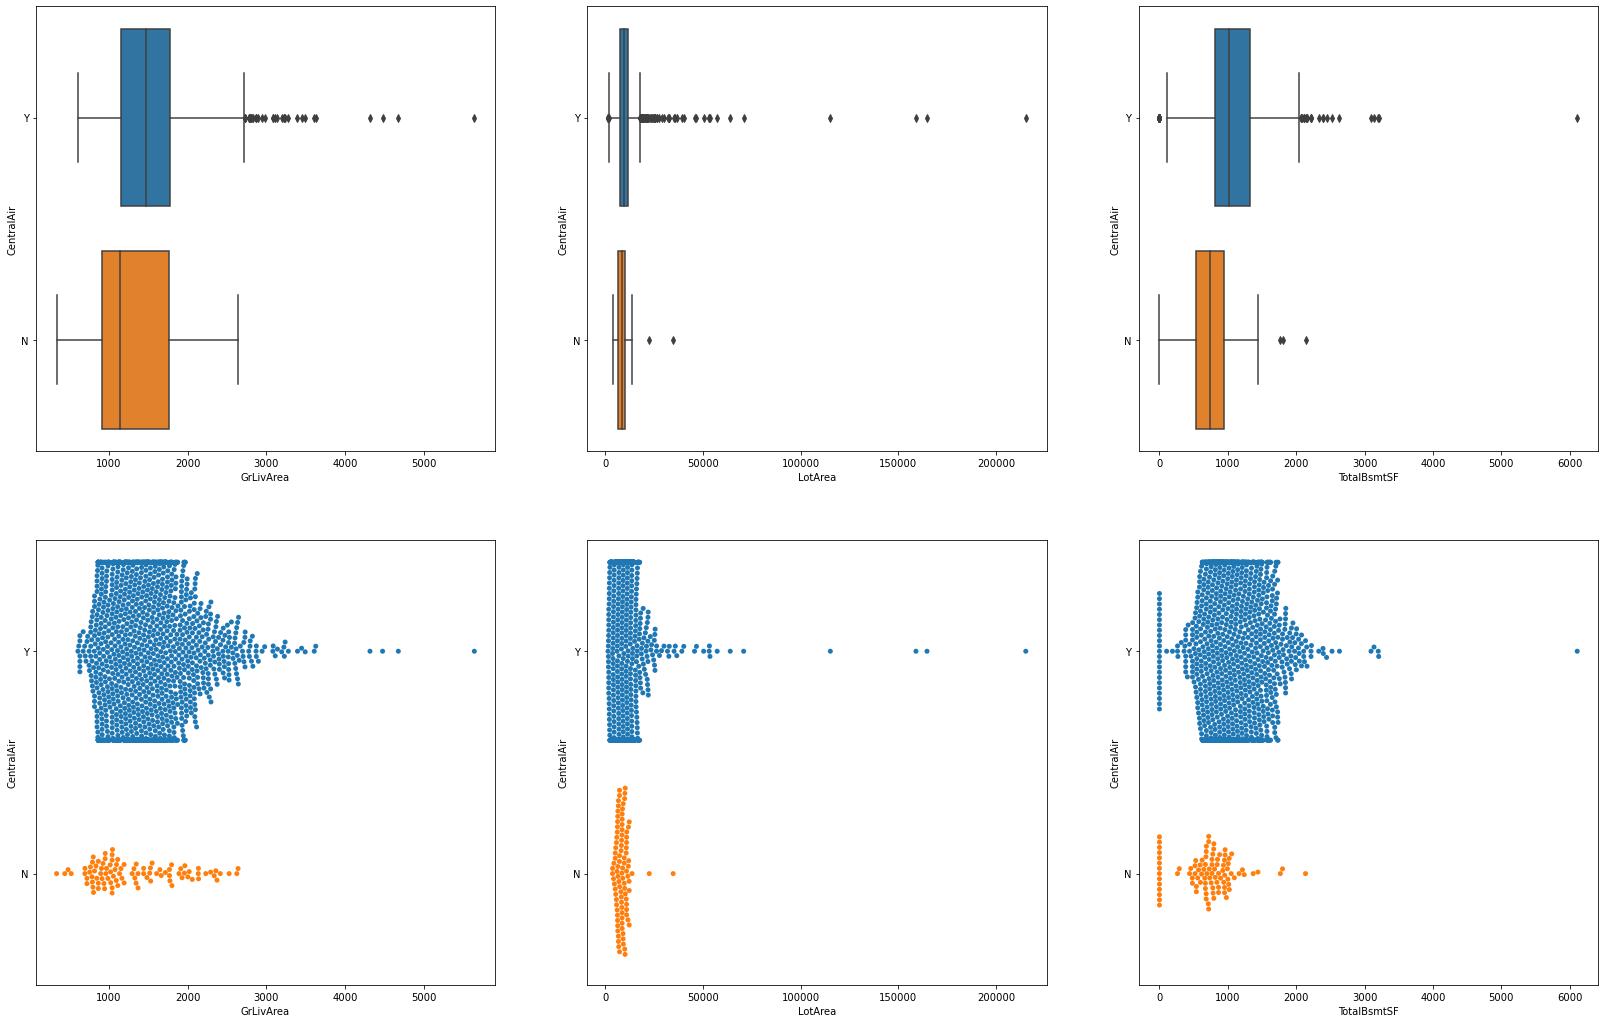

In [5]:
f , axes = plt.subplots(2 , 3 , figsize = [28,18])
sb.boxplot(x = 'GrLivArea' , y = 'CentralAir' , data = houseData , ax = axes[0,0] )
sb.boxplot(x = 'LotArea' , y = 'CentralAir' , data = houseData , ax = axes[0,1] )
sb.boxplot(x = 'TotalBsmtSF' , y = 'CentralAir' , data = houseData , ax = axes[0,2] )
sb.swarmplot(x = 'GrLivArea' , y = 'CentralAir' , data = houseData , ax = axes[1,0] )
sb.swarmplot(x = 'LotArea' , y = 'CentralAir' , data = houseData , ax = axes[1,1] )
sb.swarmplot(x = 'TotalBsmtSF' , y = 'CentralAir' , data = houseData , ax = axes[1,2] )

In [6]:
grLivAreaTree = DecisionTreeClassifier()
lotAreaTree = DecisionTreeClassifier()
totalBsmtSFTree = DecisionTreeClassifier()
grLivAreaTree.fit(grLivAreaTrain , centralAirTrain)
lotAreaTree.fit(lotAreaTrain , centralAirTrain)
totalBsmtSFTree.fit(totalBsmtSFTrain , centralAirTrain)

DecisionTreeClassifier()

In [7]:
grLivAreaTrainPredict = grLivAreaTree.predict(grLivAreaTrain)
lotAreaTrainPredict = lotAreaTree.predict(lotAreaTrain)
totalBsmtSFTrainPredict = totalBsmtSFTree.predict(totalBsmtSFTrain)

print('Classification Accuracy for grLivAreaTrain \t:' , grLivAreaTree.score(grLivAreaTrain , centralAirTrain))
print('Classification Accuracy for lotAreaTrain \t:' , lotAreaTree.score(lotAreaTrain , centralAirTrain))
print('Classification Accuracy for totalBsmtSFTrain \t:' , totalBsmtSFTree.score(totalBsmtSFTrain , centralAirTrain))

Classification Accuracy for grLivAreaTrain 	: 0.9672727272727273
Classification Accuracy for lotAreaTrain 	: 0.9781818181818182
Classification Accuracy for totalBsmtSFTrain 	: 0.9581818181818181


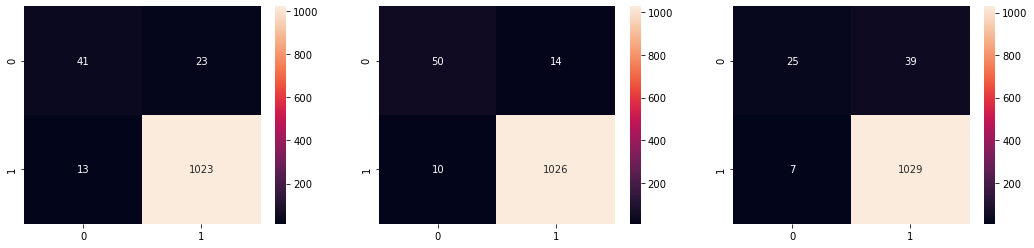

In [8]:
f , axes = plt.subplots(1 , 3 , figsize = [18 , 4])
sb.heatmap(confusion_matrix(centralAirTrain , grLivAreaTrainPredict) , ax = axes[0] , annot = True , fmt=".0f")
sb.heatmap(confusion_matrix(centralAirTrain , lotAreaTrainPredict) , ax = axes[1] , annot = True , fmt=".0f")
sb.heatmap(confusion_matrix(centralAirTrain , totalBsmtSFTrainPredict) , ax = axes[2] , annot = True , fmt=".0f")

In [9]:
grLivAreaTestPredict = grLivAreaTree.predict(grLivAreaTest)
lotAreaTestPredict = lotAreaTree.predict(lotAreaTest)
totalBsmtSFTestPredict = totalBsmtSFTree.predict(totalBsmtSFTest)

print('Classification Accuracy for grLivAreaTest \t:' , grLivAreaTree.score(grLivAreaTest , centralAirTest))
print('Classification Accuracy for lotAreaTest \t:' , lotAreaTree.score(lotAreaTest , centralAirTest))
print('Classification Accuracy for totalBsmtSFTest \t:' , totalBsmtSFTree.score(totalBsmtSFTest , centralAirTest))

Classification Accuracy for grLivAreaTest 	: 0.8805555555555555
Classification Accuracy for lotAreaTest 	: 0.8861111111111111
Classification Accuracy for totalBsmtSFTest 	: 0.8888888888888888


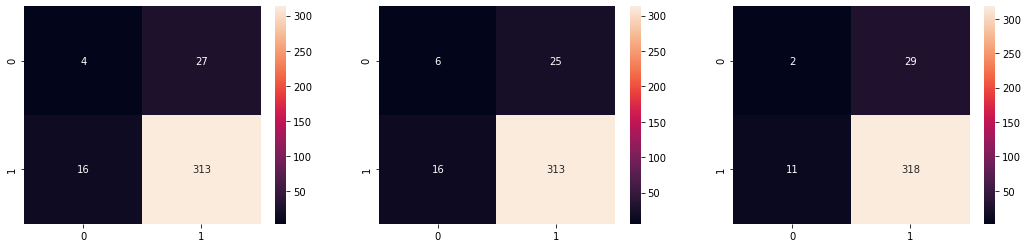

In [10]:
f , axes = plt.subplots(1 , 3 , figsize = [18 , 4])
sb.heatmap(confusion_matrix(centralAirTest , grLivAreaTestPredict) , ax = axes[0] , annot = True , fmt=".0f")
sb.heatmap(confusion_matrix(centralAirTest , lotAreaTestPredict) , ax = axes[1] , annot = True , fmt=".0f")
sb.heatmap(confusion_matrix(centralAirTest , totalBsmtSFTestPredict) , ax = axes[2] , annot = True , fmt=".0f")

In [11]:
totalTree = DecisionTreeClassifier()
totalTrain = pd.DataFrame(houseDataTrain[['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']])
totalTest = pd.DataFrame(houseDataTest[['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF']])
centralAirTrain = pd.DataFrame(houseDataTrain['CentralAir'])
centralAirTest = pd.DataFrame(houseDataTest['CentralAir'])
totalTree.fit(totalTrain , centralAirTrain)

DecisionTreeClassifier()

Classification Accuracy 	: 1.0


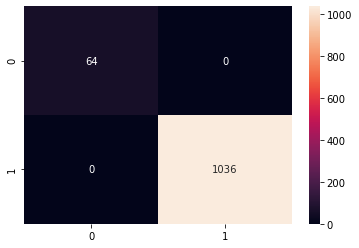

In [12]:
centralAirTrainPredict = totalTree.predict(totalTrain)
print('Classification Accuracy for totalTrain \t:' , totalTree.score(totalTrain , centralAirTrain))
sb.heatmap(confusion_matrix(centralAirTrain , centralAirTrainPredict) , annot = True , fmt = '.0f')

Classification Accuracy for TotalTest 	: 0.925


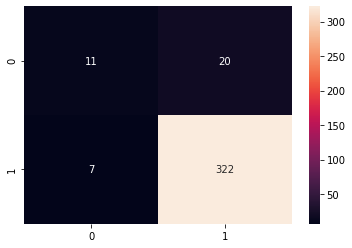

In [13]:
centralAirTestPredict = totalTree.predict(totalTest)
print('Classification Accuracy for TotalTest \t:' , totalTree.score(totalTest , centralAirTest))
sb.heatmap(confusion_matrix(centralAirTest , centralAirTestPredict) , annot = True , fmt = '.0f')